In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from scipy.sparse import hstack
import warnings
warnings.filterwarnings("ignore")

In [14]:
df = pd.read_csv('res_subset_sem.csv')
data = df.sample(frac=1)

,type,meaning_id,full_entry,meaning,gender,grammar,label_id,"ind,spec",large,sex=f,...,neg,weather,bodyparts,buildings,landscape,sex=m,milk prod.,vegetables,footwear,sicknesses
796,nv,19516,"ЧАСПАК-СИТАН ж. столб, вплотную прилегающий к ...","столб, вплотную прилегающий к стене",f,f,NaN,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0
2967,nv,10096,"ш. МАШҶИТ, МАСҶИТ, б. МИШҶИТ, МИСҶИТ ж. мечеть...",мечеть,f,f,NaN,0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0
179,nv,14650,ш. СÊР-WИΔИЧАК ж. назв. мелкой птицы. Ср. йах-...,назв. мелкой птицы,f,f,NaN,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0
1795,nv,1649,АЛИФ 1 ж. 1) алиф (название первой буквы арабс...,название первой буквы арабского алфавита,fm,f,NaN,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0
2336,nv,5307,"ГИҶ ж. козленок-самка, козочка; ш. ас дам гиҷ ...","козленок-самка, козочка",f,f,NaN,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369,nv,5544,"ДАБДАБĀ м. пышность, роскошь.","пышность, роскошь",m,m,NaN,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0
2505,nv,6789,"ЖИWАЛАСТ, ЖИWАЛТАСТ м. блеск, сияние; жиwаласт...","блеск, сияние",m,m,NaN,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0
2979,nv,10131,"МĀWӢҶ, ж. МĀWĀН мяукающий; ш. йид ту-нд лап мā...",мяукающий,f,f,NaN,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0
1033,nv,12881,"ПӢЛ(Л)АКОРИ, ПӢЛ(Л)АДОРИ м. шелководство; пӣл(...",шелководство,m,m,NaN,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0


In [15]:
data['meaning'] = data['meaning'].str.replace('ж\.', '').str.replace('м\.', '').str.replace('женское', '').str.replace('мужское', '').str.replace('муж.', '').str.replace('жен.', '').str.replace(' ж ', '').str.replace(' м ', '')
data['full_entry'] = data['full_entry'].str.replace('ж\.', '').str.replace('м\.', '').str.replace('женское', '').str.replace('мужское', '').str.replace('муж.', '').str.replace('жен.', '').str.replace(' ж ', '').str.replace(' м ', '')

,type,meaning_id,full_entry,meaning,gender,grammar,label_id,"ind,spec",large,sex=f,...,neg,weather,bodyparts,buildings,landscape,sex=m,milk prod.,vegetables,footwear,sicknesses
796,nv,19516,"ЧАСПАК-СИТАН столб, вплотную прилегающий к ст...","столб, вплотную прилегающий к стене",f,f,NaN,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0
2967,nv,10096,"ш. МАШҶИТ, МАСҶИТ, б. МИШҶИТ, МИСҶИТ мечеть; ...",мечеть,f,f,NaN,0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0
179,nv,14650,ш. СÊР-WИΔИЧАК назв. мелкой птицы. Ср. йах-wи...,назв. мелкой птицы,f,f,NaN,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0
1795,nv,1649,АЛИФ 1 1) алиф (название первой буквы арабско...,название первой буквы арабского алфавита,fm,f,NaN,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0
2336,nv,5307,"ГИҶ козленок-самка, козочка; ш. ас дам гиҷ х̌...","козленок-самка, козочка",f,f,NaN,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369,nv,5544,"ДАБДАБĀ пышность, роскошь.","пышность, роскошь",m,m,NaN,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0
2505,nv,6789,"ЖИWАЛАСТ, ЖИWАЛТАСТ блеск, сияние; жиwаласт ч...","блеск, сияние",m,m,NaN,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0
2979,nv,10131,"МĀWӢҶ, МĀWĀН мяукающий; ш. йид ту-нд лап мāwӣ...",мяукающий,f,f,NaN,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0
1033,nv,12881,"ПӢЛ(Л)АКОРИ, ПӢЛ(Л)АДОРИ шелководство; пӣл(л)...",шелководство,m,m,NaN,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0


In [4]:
X_short = data['meaning']
y_short = data['grammar']

vectorizer = CountVectorizer()
X_short_vec = vectorizer.fit_transform(X_short)

X_short_train, X_short_test, y_short_train, y_short_test = train_test_split(X_short_vec, y_short, test_size=0.2, random_state=42)

mnb_short = MultinomialNB()
mnb_short.fit(X_short_train, y_short_train)

y_pred_mnb_short = mnb_short.predict(X_short_test)

accuracy_mnb_short = accuracy_score(y_short_test, y_pred_mnb_short)
print(f'Accuracy of MNB on short meaning: {accuracy_mnb_short}')

rfc_short = RandomForestClassifier()
rfc_short.fit(X_short_train, y_short_train)

y_pred_rfc_short = rfc_short.predict(X_short_test)

accuracy_rfc_short = accuracy_score(y_short_test, y_pred_rfc_short)
print(f'Accuracy of RFC on short meaning: {accuracy_rfc_short}')

dt_short = DecisionTreeClassifier()
dt_short.fit(X_short_train, y_short_train)

y_pred_dt_short = dt_short.predict(X_short_test)

accuracy_dt_short = accuracy_score(y_short_test, y_pred_dt_short)
print(f'Accuracy of RFC on short meaning: {accuracy_dt_short}')

Accuracy of MNB on short meaning: 0.6892109500805152
Accuracy of RFC on short meaning: 0.6264090177133655


In [126]:
X_short = data['meaning']
y_short = data['grammar']

vectorizer = CountVectorizer()
X_short_vec = vectorizer.fit_transform(X_short)

X_short_train, X_short_test, y_short_train, y_short_test = train_test_split(X_short_vec, y_short, test_size=0.2, random_state=42)

mnb_short = MultinomialNB()
mnb_short.fit(X_short_train, y_short_train)

y_pred_mnb_short = mnb_short.predict(X_short_test)

accuracy_mnb_short = accuracy_score(y_short_test, y_pred_mnb_short)
print(f'Accuracy of MNB on short meaning: {accuracy_mnb_short}')

rfc_short = RandomForestClassifier()
rfc_short.fit(X_short_train, y_short_train)

y_pred_rfc_short = rfc_short.predict(X_short_test)

accuracy_rfc_short = accuracy_score(y_short_test, y_pred_rfc_short)
print(f'Accuracy of RFC on short meaning: {accuracy_rfc_short}')

dt_short = DecisionTreeClassifier()
dt_short.fit(X_short_train, y_short_train)

y_pred_dt_short = dt_short.predict(X_short_test)

accuracy_dt_short = accuracy_score(y_short_test, y_pred_dt_short)
print(f'Accuracy of dt on short meaning: {accuracy_dt_short}')

Accuracy of MNB on short meaning: 0.6959349593495935
Accuracy of RFC on short meaning: 0.5707317073170731
Accuracy of dt on short meaning: 0.5739837398373984


In [127]:
X_full = data['full_entry']
y_full = data['grammar']

vectorizer = CountVectorizer()
X_full_vec = vectorizer.fit_transform(X_full)

X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_full_vec, y_full, test_size=0.2, random_state=42)

mnb_full = MultinomialNB()
mnb_full.fit(X_full_train, y_full_train)

y_pred_mnb_full = mnb_full.predict(X_full_test)

accuracy_mnb_full = accuracy_score(y_full_test, y_pred_mnb_full)
print(f'Accuracy of MNB on full meaning: {accuracy_mnb_full}')

rfc_full = RandomForestClassifier()
rfc_full.fit(X_full_train, y_full_train)

y_pred_rfc_full = rfc_full.predict(X_full_test)

accuracy_rfc_full = accuracy_score(y_full_test, y_pred_rfc_full)
print(f'Accuracy of RFC on full meaning: {accuracy_rfc_full}')

dt_full = DecisionTreeClassifier()
dt_full.fit(X_full_train, y_full_train)

y_pred_dt_full = dt_full.predict(X_full_test)

accuracy_dt_full = accuracy_score(y_full_test, y_pred_dt_full)
print(f'Accuracy of dt on full meaning: {accuracy_dt_full}')

Accuracy of MNB on full meaning: 0.6894308943089431
Accuracy of RFC on full meaning: 0.7382113821138211
Accuracy of dt on full meaning: 0.6894308943089431


In [11]:
def extract_forms(text):
    words = text.split()
    for word in words:
        word = word.replace("(", "").replace(")", "").replace(",", "").replace("-", "")
        if word.isupper():
            return word
            break

In [8]:
def extract_x_letters(word, n):
    word = word.replace("-", "")
    if nround not in word[-n:] and apostr not in word[-n:]:
        return word[-n:]
    else:
        return word[(-n-1):]

In [16]:
data['forms'] = data['full_entry'].apply(lambda x: extract_forms(x))
data = data.dropna(subset=['forms'])

In [22]:
nround = data.loc[347, 'forms'][-3:-1]
apostr = data.loc[982, 'forms'][-2:]

̊Н Х̌


In [20]:
data['last_2_letters'] = data['forms'].apply(lambda x: extract_x_letters(x, 2))
data['last_3_letters'] = data['forms'].apply(lambda x: extract_x_letters(x, 3))
data['last_4_letters'] = data['forms'].apply(lambda x: extract_x_letters(x, 4))

In [25]:
vectorizer2 = CountVectorizer(analyzer='char', ngram_range=(2,2))
X2 = vectorizer2.fit_transform(data['last_2_letters'])
vectorizer3 = CountVectorizer(analyzer='char', ngram_range=(3,3))
X3 = vectorizer3.fit_transform(data['last_3_letters'])
vectorizer4 = CountVectorizer(analyzer='char', ngram_range=(4,4))
X4 = vectorizer4.fit_transform(data['last_4_letters'])

X_train2, X_test2, y_train, y_test = train_test_split(X2, data['grammar'], test_size=0.2, random_state=42)
X_train3, X_test3, _, _ = train_test_split(X3, data['grammar'], test_size=0.2, random_state=42)
X_train4, X_test4, _, _ = train_test_split(X4, data['grammar'], test_size=0.2, random_state=42)

model2 = RandomForestClassifier()
model2.fit(X_train2, y_train)
predictions2 = model2.predict(X_test2)

model3 = RandomForestClassifier()
model3.fit(X_train3, y_train)
predictions3 = model3.predict(X_test3)

model4 = RandomForestClassifier()
model4.fit(X_train4, y_train)
predictions4 = model4.predict(X_test4)

accuracy2 = accuracy_score(y_test, predictions2)
accuracy3 = accuracy_score(y_test, predictions3)
accuracy4 = accuracy_score(y_test, predictions4)

print(f'Accuracy for 2 letters: {accuracy2}')
print(f'Accuracy for 3 letters: {accuracy3}')
print(f'Accuracy for 4 letters: {accuracy4}')

Accuracy for 2 letters: 0.6211382113821138
Accuracy for 3 letters: 0.6552845528455284
Accuracy for 4 letters: 0.5707317073170731


In [31]:
X_sem = data[['ind,spec', 'large', 'sex=f', 'animals', 'water', 'trees', 'fruit', 'tech,transport', 'cultural prod.', 'mass,abstr', 'small', 'name', 'household objects', 'food', 'drink', 'plants', 'events', 'pos', 'neg', 'weather', 'bodyparts', 'buildings', 'landscape', 'sex=m', 'milk prod.', 'vegetables', 'footwear', 'sicknesses']]
y_sem = data['grammar']

X_sem_train, X_sem_test, y_sem_train, y_sem_test = train_test_split(X_sem, y_sem, test_size=0.2, random_state=42)

dt_sem = DecisionTreeClassifier()
dt_sem.fit(X_sem_train, y_sem_train)

y_pred_dt_sem = dt_sem.predict(X_sem_test)
accuracy_dt_sem = accuracy_score(y_sem_test, y_pred_dt_sem)
print(f"Accuracy of Decision Tree on semantics: {accuracy_dt_sem}")

rfc_sem = RandomForestClassifier()
rfc_sem.fit(X_sem_train, y_sem_train)

y_pred_rfc_sem = rfc_sem.predict(X_sem_test)

accuracy_rfc_sem = accuracy_score(y_sem_test, y_pred_rfc_sem)
print(f"Accuracy of Random Forest on semantics: {accuracy_rfc_sem}")

Accuracy of Decision Tree on semantics: 0.7203252032520325
Accuracy of Random Forest on semantics: 0.7235772357723578


In [85]:
logsem = LogisticRegression()
logsem.fit(X_sem_train, y_sem_train)

y_pred_logsem = logsem.predict(X_sem_test)

accuracy_logsem = accuracy_score(y_sem_test, y_pred_logsem)
print(f"Accuracy of Logistic Regression classifier semantic model: {accuracy_logsem}")

Accuracy of Logistic Regression classifier semantic model: 0.7203252032520325


In [33]:
features = ['ind,spec', 'large', 'sex=f', 'animals', 'water', 'trees', 'fruit', 'tech,transport', 'cultural prod.', 'mass,abstr', 'small', 'name', 'household objects', 'food', 'drink', 'plants', 'events', 'pos', 'neg', 'weather', 'bodyparts', 'buildings', 'landscape', 'sex=m', 'milk prod.', 'vegetables', 'footwear', 'sicknesses']

In [34]:
importances = dt_sem.feature_importances_

indices = np.argsort(importances)[::-1]

print("Важность признаков:")
for f in range(X_sem.shape[1]):
    print(f"{f + 1}. Признак {features[indices[f]]}: {importances[indices[f]]}")

Важность признаков:
1. Признак mass,abstr: 0.37586835656737805
2. Признак sex=f: 0.07660148563060983
3. Признак animals: 0.05838601905029437
4. Признак household objects: 0.04140665833519872
5. Признак cultural prod.: 0.04103233851637174
6. Признак sex=m: 0.04063680608139646
7. Признак water: 0.03868383462826089
8. Признак ind,spec: 0.038639911546854894
9. Признак buildings: 0.03376238046334201
10. Признак neg: 0.030712678396296083
11. Признак food: 0.027886600858157126
12. Признак trees: 0.02667948874999312
13. Признак landscape: 0.026612758499430376
14. Признак pos: 0.02179601292165217
15. Признак fruit: 0.01601168997523292
16. Признак plants: 0.01391980224964286
17. Признак tech,transport: 0.013100272493229988
18. Признак small: 0.012623097962046534
19. Признак large: 0.012323082288335946
20. Признак sicknesses: 0.009475943555323402
21. Признак events: 0.009257085088139664
22. Признак bodyparts: 0.009178041666736293
23. Признак drink: 0.008778907744609125
24. Признак weather: 0.0054

In [121]:
X = data['meaning']
y = data['grammar']

vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

X_semantic = data[['ind,spec', 'large', 'sex=f', 'animals', 'water', 'trees', 'fruit', 'tech,transport', 
                   'cultural prod.', 'mass,abstr', 'small', 'name', 'household objects', 'food', 'drink', 
                   'plants', 'events', 'pos', 'neg', 'weather', 'bodyparts', 'buildings', 'landscape', 
                   'sex=m', 'milk prod.', 'vegetables', 'footwear', 'sicknesses']]

X_combined = hstack((X_vec, X_semantic))

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree model: {accuracy}")

Accuracy of Decision Tree model: 0.7365853658536585


In [122]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest Classifier model: {accuracy_rf}")

Accuracy of Random Forest Classifier model: 0.7560975609756098


In [123]:
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)

y_pred_logreg = logreg_classifier.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy of Logistic Regression classifier model: {accuracy_logreg}")

Accuracy of Logistic Regression classifier model: 0.7447154471544716


In [129]:
np.random.seed(42)
X = data['meaning']
y = data['grammar']

# Векторизация определений слов
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

# Подготовка семантических признаков
X_semantic = data[['ind,spec', 'large', 'sex=f', 'animals', 'water', 'trees', 'fruit', 'tech,transport', 
                   'cultural prod.', 'mass,abstr', 'small', 'name', 'household objects', 'food', 'drink', 
                   'plants', 'events', 'pos', 'neg', 'weather', 'bodyparts', 'buildings', 'landscape', 
                   'sex=m', 'milk prod.', 'vegetables', 'footwear', 'sicknesses']]

vectorizer3 = CountVectorizer(analyzer='char', ngram_range=(3,3))
X3 = vectorizer3.fit_transform(data['last_3_letters'])

X_combined = hstack((X_vec, X_semantic, X3))

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

rfc_c = RandomForestClassifier()
rfc_c.fit(X_train, y_train)

y_pred = rfc_c.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree model: {accuracy}")

Accuracy of Decision Tree model: 0.7414634146341463


In [130]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest Classifier model: {accuracy_rf}")

Accuracy of Random Forest Classifier model: 0.7414634146341463


In [131]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier()
mlp_classifier.fit(X_train, y_train)

y_pred_mlp = mlp_classifier.predict(X_test)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Accuracy of MLP Classifier model: {accuracy_mlp}")

Accuracy of MLP Classifier model: 0.7528455284552845


In [132]:
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)

y_pred_logreg = logreg_classifier.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy of Logistic Regression classifier model: {accuracy_logreg}")

Accuracy of Logistic Regression classifier model: 0.7544715447154472


In [133]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           f       0.74      0.78      0.76       275
          fm       0.75      0.12      0.20        26
           m       0.77      0.78      0.77       314

    accuracy                           0.75       615
   macro avg       0.75      0.56      0.58       615
weighted avg       0.75      0.75      0.74       615



In [134]:
cml = confusion_matrix(y_test, y_pred_logreg, labels=['f',  'fm','m',  ])
cml

array([[215,   1,  59],
       [  7,   3,  16],
       [ 68,   0, 246]], dtype=int64)

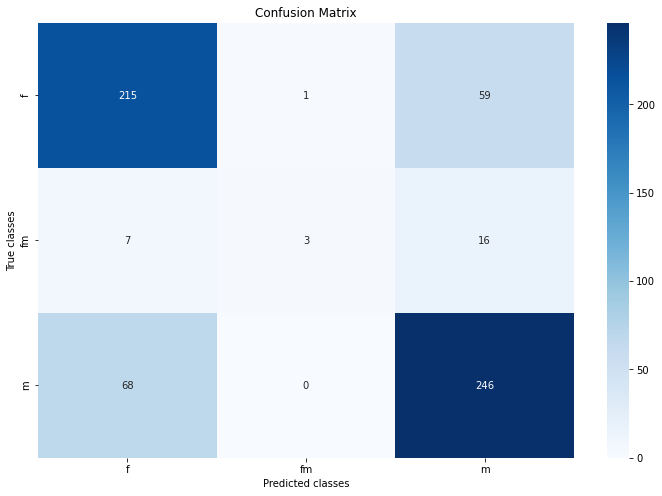

In [135]:
plt.figure(figsize=(12, 8))
sns.heatmap(cml, annot=True, fmt='d', xticklabels=['f',  'fm','m',  ], yticklabels=['f',  'fm','m',  ], cmap='Blues')
plt.xlabel('Predicted classes')
plt.ylabel('True classes')
plt.title('Confusion Matrix')
plt.show()